In [405]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import respy as rp
import numpy as np

params_base, options, df = rp.get_example_model("robinson", with_data=True)

params_base["lower"] = [0.9, 0.00, -0.20, 1.00, 0.0050, 0.001, -0.9]
params_base["upper"] = [1.0, 0.10,  0.00, 1.10, 0.0150, 0.030, +0.9]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


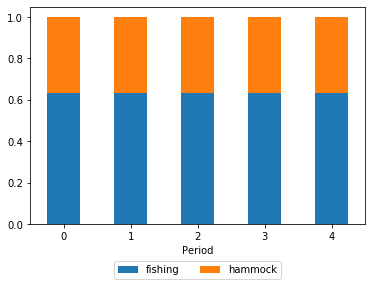

In [393]:

fig, ax = plt.subplots()

df.groupby("Period").Choice.value_counts(normalize=True).unstack().plot.bar(
    stacked=True, ax=ax
)


plt.xticks(rotation="horizontal")

plt.legend(loc="lower center", bbox_to_anchor=(0.5,-0.275), ncol=2)

plt.show()
plt.close()


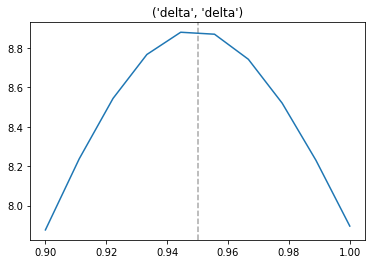

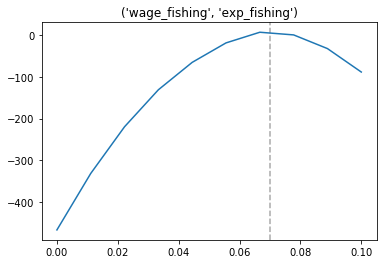

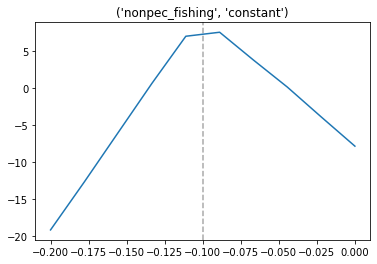

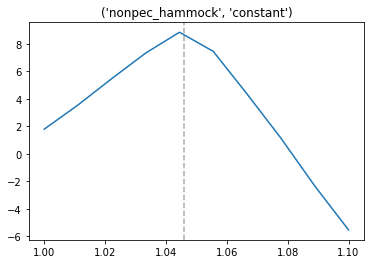

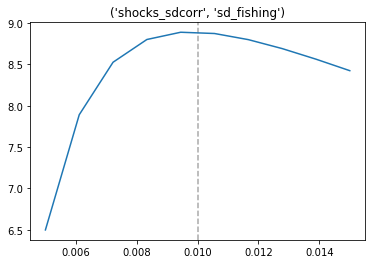

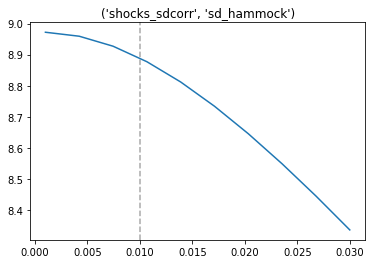

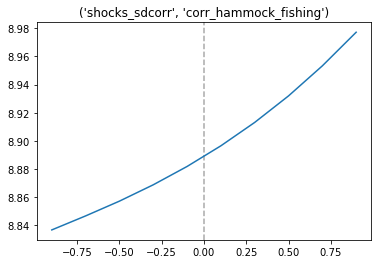

In [397]:
crit_func = rp.get_crit_func(params_base, options, df)

for index in params.index:
    upper, lower = params_base.loc[index][["upper", "lower"]]

    grid = np.linspace(lower, upper, 10)
    
    fvals = list()
    for value in grid:
        params = params_base.copy()
        params.loc[index, "value"] = value
        fvals.append(crit_func(params))
    
    fig, ax = plt.subplots()

    ax.axvline(params_base.loc[index, "value"], color="#A9A9A9", linestyle="--", label="Baseline")
    
    ax.plot(grid, fvals)
    ax.set_title(index)
    plt.show()